In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

data = pd.read_csv("heart_cleveland.csv")




data.head()



print(data.shape)
print(data.dtypes)


(297, 11)
age            int64
trestbps       int64
chol           int64
thalach        int64
oldpeak      float64
cp             int64
exang          int64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


In [2]:
X = data.filter(['age','trestbps','chol','thalach','oldpeak'])
X.head()


Y = data['condition'].to_numpy()
# ou
# Y = (data['condition'].values)
# Y = (data.filter(['condition']).values)[:,0]
# Y = (np.array(data.filter(['condition'])).T)[0]
print(Y)
Y.shape
type(Y)



Y.mean()


[0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0
 1]


0.4612794612794613

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(237, 5)
(60, 5)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)




pred = knn_model.predict(X_test)
pred




print(y_train.mean())
print(y_test.mean())




(pred != y_test).mean()


0.4810126582278481
0.38333333333333336


0.4166666666666667

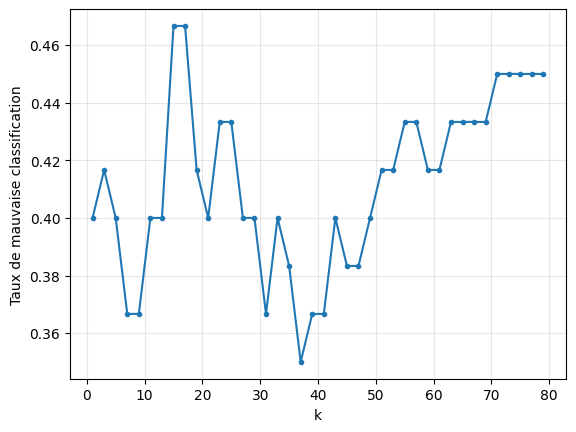

37

In [5]:
np.arange(1,81,2)

err = []
for k in np.arange(1,81,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    Y_pred = knn_model.predict(X_test)
    err.append((Y_pred != y_test).mean())



plt.figure()
plt.plot(np.arange(1,81,2), err, '.-')
plt.xlabel('k')
plt.ylabel('Taux de mauvaise classification')
plt.grid(alpha=0.3)
plt.show()

np.arange(1,81,2)[np.argmin(np.array(err))]


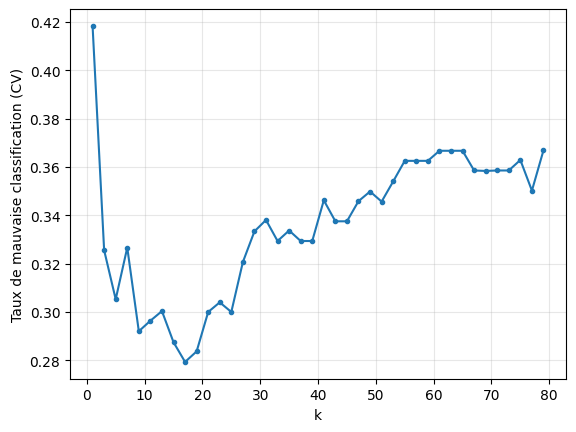

In [6]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 81,2)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters,cv=10)
gridsearch.fit(X_train, y_train)

gridsearch.best_params_

gridsearch.cv_results_['mean_test_score']

plt.figure()
plt.plot(np.arange(1,81,2), 1-gridsearch.cv_results_['mean_test_score'], '.-')
plt.grid(alpha=0.3)
plt.xlabel('k')
plt.ylabel('Taux de mauvaise classification (CV)')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

np.mean(X_train_standard)


-9.36897067194225e-17

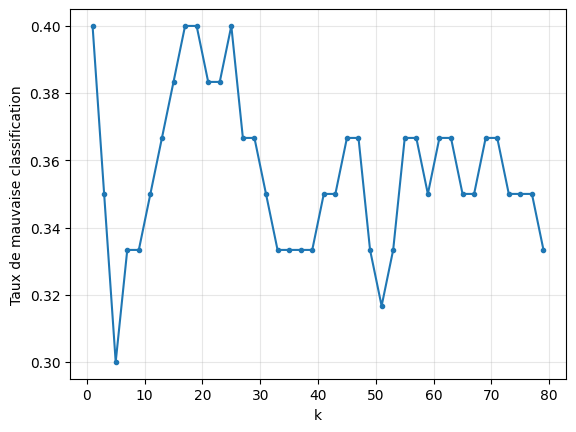

5

In [8]:
err = []
for k in np.arange(1,81,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_standard, y_train)
    Y_pred = knn_model.predict(X_test_standard)
    err.append((Y_pred != y_test).mean())



plt.figure()
plt.plot(np.arange(1,81,2), err, '.-')
plt.xlabel('k')
plt.ylabel('Taux de mauvaise classification')
plt.grid(alpha=0.3)
plt.show()




np.arange(1,81,2)[np.argmin(np.array(err))]


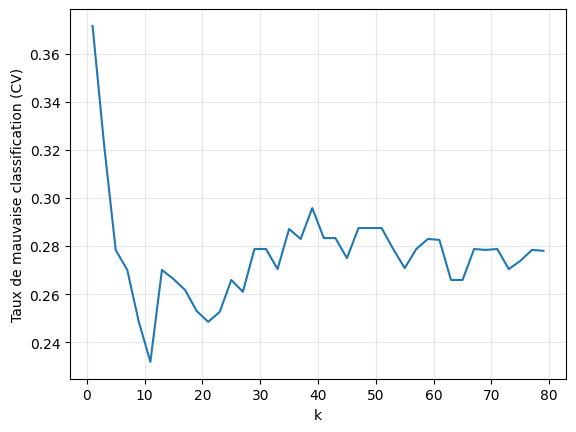

In [9]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 81,2)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters,cv=20)
gridsearch.fit(X_train_standard, y_train)




gridsearch.best_params_
gridsearch.best_score_
gridsearch.cv_results_['mean_test_score']



plt.figure()
plt.plot(np.arange(1,81,2), 1-gridsearch.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Taux de mauvaise classification (CV)')
plt.grid(alpha=0.3)
plt.show()


In [10]:
X_standard = standard_scaler.fit_transform(X)
X_standard = pd.DataFrame(X_standard)

X.columns
X_standard.columns = X.columns

newcol = {'cp' : data['cp'], 'exang' : data['exang'],'slope' : data['slope'],'ca' : data['ca'],'thal' : data['thal']}
X_new = X_standard.assign(**newcol)
X_new

X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
print(X_train_new.shape)
print(X_test_new.shape)


(237, 10)
(60, 10)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=18)
knn_model.fit(X_train_new, y_train)


KNeighborsClassifier(n_neighbors=18)

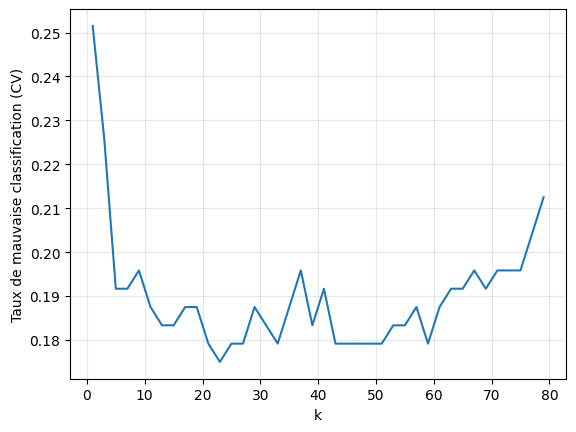

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 81,2)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters,cv=20)
gridsearch.fit(X_train_new, y_train)



plt.figure()
plt.plot(np.arange(1,81,2), 1-gridsearch.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Taux de mauvaise classification (CV)')
plt.grid(alpha=0.3)
plt.show()


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.005402      0.002152         0.009001        0.004942   
1        0.004600      0.000800         0.005000        0.001000   
2        0.005300      0.000901         0.006900        0.000537   
3        0.003502      0.000923         0.004299        0.000900   
4        0.004202      0.000869         0.005596        0.000664   
..            ...           ...              ...             ...   
75       0.009985      0.003128         0.011100        0.002700   
76       0.008135      0.001448         0.011666        0.002755   
77       0.008499      0.001205         0.009300        0.001267   
78       0.008006      0.001092         0.012095        0.001969   
79       0.009704      0.004878         0.009796        0.003398   

   param_n_neighbors param_weights  \
0                  1       uniform   
1                  1      distance   
2                  3       uniform   
3                  3      dista

C:\Users\valen\AppData\Local\Temp\ipykernel_16288\2793318436.py:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  results_short = results.pivot(index='param_n_neighbors', columns='param_weights', values='mean_test_score')


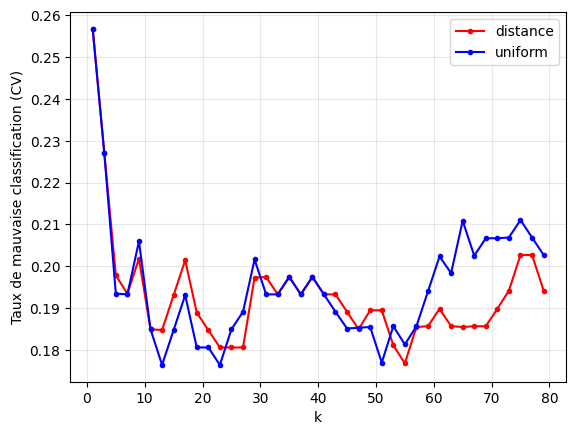

In [13]:
##Try to change the kernel##
from sklearn.model_selection import GridSearchCV
weights = ['uniform', 'distance']
parameters = {"n_neighbors": range(1, 81,2), "weights": weights}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters,cv=10)
gridsearch.fit(X_train_new, y_train)


gridsearch.best_params_
gridsearch.best_score_
gridsearch.cv_results_['mean_test_score']

gridsearch.cv_results_['params']

results = pd.DataFrame(gridsearch.cv_results_)
print(results)
results.columns

results_short = results.pivot(index='param_n_neighbors', columns='param_weights', values='mean_test_score')
results_short

plt.figure()
plt.plot(np.arange(1,81,2), 1-results_short['distance'],'r.-')
plt.plot(np.arange(1,81,2), 1-results_short['uniform'],'b.-')
plt.xlabel('k')
plt.ylabel('Taux de mauvaise classification (CV)')
plt.grid(alpha=0.3)
plt.legend(['distance','uniform'])
plt.show()


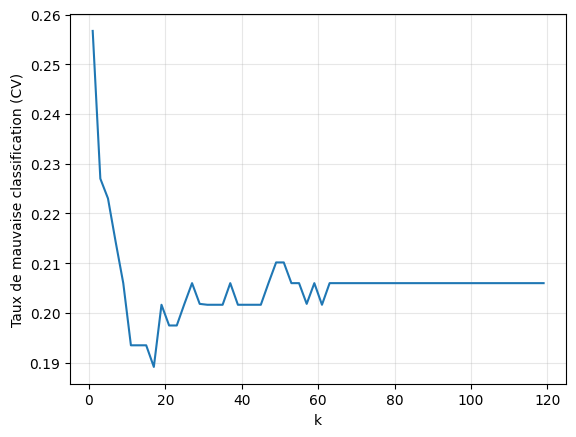

In [14]:
##Gaussian kernel
def gaussian_kernel(distances): 
    weights = np.exp(- (distances ** 2) / 2)
    return weights / np.sum(weights)
# (ex) gaussian_kernel(np.array([0.5, 1.0, 1.5]))

parameters = {"n_neighbors": range(1, 121,2), "weights": [gaussian_kernel]}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters,cv=10)
gridsearch.fit(X_train_new, y_train)


gridsearch.best_params_
1-gridsearch.best_score_

plt.figure()
plt.plot(np.arange(1,121,2), 1-gridsearch.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Taux de mauvaise classification (CV)')
plt.grid(alpha=0.3)
plt.show()


In [15]:
#Try to optimise with respect to many parameters
weights = ['uniform', 'distance',gaussian_kernel]
parameters = {"n_neighbors": range(1, 121,2), "weights": weights, "p": [0.5,1,2], "algorithm": ['brute']}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters,cv=5)
gridsearch.fit(X_train_new, y_train)

gridsearch.best_params_
1-gridsearch.best_score_

# Pour terminer, choisir le modele avec les parametres optimaux et evaluer sur le test set
# knn_model = KNeighborsClassifier(n_neighbors=, weights='', p=)
knn_model.fit(X_train_new, y_train)
pred = knn_model.predict(X_test_new)
(pred != y_test).mean()


c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\neighbors\_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  Fil

0.15